In [1]:
import pandas as pd
import datetime
from math import radians, cos, sin, asin, sqrt
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
def parse_timestamp(time_in_secs):    
    return datetime.datetime.fromtimestamp(int(time_in_secs) / 1e6)

def df_dist(row):
    return haversine(row['Lon'], row['Lat'], row['Lon_prev'], row['Lat_prev'])

def df_speed(row):
    if not row['Time deltas'].total_seconds():
        return 0
    m_s = row['Traveled dist'] * 1000 / row['Time deltas'].total_seconds()
    km_h = m_s * 3.6
    return km_h

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [30]:
# Columns description
# Timestamp micro since 1970 01 01 00:00:00 GMT'
# Line ID
# Direction
# Journey Pattern ID
# Time Frame (The start date of the production time table - in Dublin the production time table starts at 6am and ends at 3am)
# Vehicle Journey ID (A given run on the journey pattern)
# Operator (Bus operator, not the driver)
# Congestion [0=no,1=yes]
# Lon WGS84
# Lat WGS84
# Delay (seconds, negative if bus is ahead of schedule)
# Block ID (a section ID of the journey pattern)
# Vehicle ID
# Stop ID
# At Stop [0=no,1=yes]

categorical_columns = ['Line ID', 'Direction', 'Journey Pattern ID', 'Vehicle Journey ID', 'Operator', 'Congestion', 'Block ID', 'Vehicle ID', 'Stop ID', 'At Stop']
df = pd.read_csv('sir140113-200113/siri.20130114.csv.gz',
                 names=['Timestamp', 'Line ID', 'Direction', 'Journey Pattern ID', 'Time Frame', 'Vehicle Journey ID', 'Operator', 'Congestion', 'Lon', 'Lat', 'Delay', 'Block ID', 'Vehicle ID', 'Stop ID', 'At Stop'],
                 parse_dates=[0], date_parser=parse_timestamp,
                 dtype={col_name: 'category' for col_name in categorical_columns},
                 na_values=['null'])

df = df.dropna(subset=['Journey Pattern ID'])

In [31]:
df.columns

Index(['Timestamp', 'Line ID', 'Direction', 'Journey Pattern ID', 'Time Frame',
       'Vehicle Journey ID', 'Operator', 'Congestion', 'Lon', 'Lat', 'Delay',
       'Block ID', 'Vehicle ID', 'Stop ID', 'At Stop'],
      dtype='object')

In [32]:
df.dtypes

Timestamp             datetime64[ns]
Line ID                     category
Direction                   category
Journey Pattern ID          category
Time Frame                    object
Vehicle Journey ID          category
Operator                    category
Congestion                  category
Lon                          float64
Lat                          float64
Delay                          int64
Block ID                    category
Vehicle ID                  category
Stop ID                     category
At Stop                     category
dtype: object

In [33]:
for c in categorical_columns:
    print(c)
    print(df[c].unique())
    print('-----')

Line ID
[66, 40, 27, 39, 46, ..., 51, 142, 111, 116, 118]
Length: 65
Categories (65, object): [66, 40, 27, 39, ..., 142, 111, 116, 118]
-----
Direction
[0]
Categories (1, object): [0]
-----
Journey Pattern ID
[00660001, 040D0001, 077A1001, 039A0001, 046A0001, ..., 00111002, 00371002, 014C0001, 01851008, 00331005]
Length: 442
Categories (442, object): [00660001, 040D0001, 077A1001, 039A0001, ..., 00371002, 014C0001, 01851008, 00331005]
-----
Vehicle Journey ID
[14217, 14403, 14130, 14729, 16565, ..., 6674, 4288, 4465, 1580, 5340]
Length: 7440
Categories (7440, object): [14217, 14403, 14130, 14729, ..., 4288, 4465, 1580, 5340]
-----
Operator
[PO, HN, RD, D1, SL, CD, CF, D2]
Categories (8, object): [PO, HN, RD, D1, SL, CD, CF, D2]
-----
Congestion
[0, 1]
Categories (2, object): [0, 1]
-----
Block ID
[66006, 40204, 27009, 39015, 46007, ..., 9012, 145001, 46030, 83015, 145070]
Length: 862
Categories (862, object): [66006, 40204, 27009, 39015, ..., 145001, 46030, 83015, 145070]
-----
Vehicle

In [35]:
df.head()

,Timestamp,Line ID,Direction,Journey Pattern ID,Time Frame,Vehicle Journey ID,Operator,Congestion,Lon,Lat,Delay,Block ID,Vehicle ID,Stop ID,At Stop
0,2013-01-14 04:00:01,66,0,00660001,2013-01-13,14217,PO,0,-6.569710,53.380451,222,66006,40001,3968,0
1,2013-01-14 04:00:01,40,0,040D0001,2013-01-13,14403,HN,0,-6.373083,53.410049,338,40204,38067,6005,0
2,2013-01-14 04:00:01,27,0,077A1001,2013-01-13,14130,RD,0,-6.259118,53.345650,-534,27009,33254,1358,0
3,2013-01-14 04:00:01,39,0,039A0001,2013-01-13,14729,PO,0,-6.274983,53.350784,-125,39015,33557,7160,0
4,2013-01-14 04:00:01,46,0,046A0001,2013-01-13,16565,D1,0,-6.230600,53.317665,-988,46007,33532,2032,0


In [36]:
df.describe()

,Lon,Lat,Delay
count,1.463891e+06,1.463891e+06,1.463891e+06
mean,-6.269824e+00,5.334387e+01,-1.044905e+02
std,8.185974e-02,5.470727e-02,4.529178e+02
min,-6.615016e+00,5.307043e+01,-4.698000e+03
25%,-6.306161e+00,5.331897e+01,-3.210000e+02
50%,-6.261166e+00,5.334609e+01,-5.400000e+01
75%,-6.230783e+00,5.337304e+01,6.700000e+01
max,-6.053083e+00,5.360650e+01,3.136200e+04


In [9]:
# Ugly way to make coordinates start at 0. http://spatialreference.org/ref/epsg/wgs-84/
df['Lat'] += 180
df['Lon'] += 90

In [37]:
df.describe()

,Lon,Lat,Delay
count,1.463891e+06,1.463891e+06,1.463891e+06
mean,-6.269824e+00,5.334387e+01,-1.044905e+02
std,8.185974e-02,5.470727e-02,4.529178e+02
min,-6.615016e+00,5.307043e+01,-4.698000e+03
25%,-6.306161e+00,5.331897e+01,-3.210000e+02
50%,-6.261166e+00,5.334609e+01,-5.400000e+01
75%,-6.230783e+00,5.337304e+01,6.700000e+01
max,-6.053083e+00,5.360650e+01,3.136200e+04


In [38]:
lat_min = df['Lat'].min()
lat_range = df['Lat'].max() - lat_min
lon_min = df['Lon'].min()
lon_range = df['Lon'].max() - lon_min

In [39]:
# Get coordinate step for given number of cells.
num_cells = 300
lat_step = lat_range / num_cells
lon_step = lon_range / num_cells
print(lat_step)
print('lat step: {:.2f}km'.format(haversine(0, 0, lat_step, 0)))
print('lon step: {:.2f}km'.format(haversine(0, 0, lon_step, 0)))

0.00178688
lat step: 0.20km
lon step: 0.21km


0


/home/sokolov/miniconda3/envs/bus-stops/lib/python3.5/site-packages/numpy/lib/function_base.py:583: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/home/sokolov/miniconda3/envs/bus-stops/lib/python3.5/site-packages/numpy/lib/function_base.py:584: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


lat_idx 0 lon_idx 293
Cell line ID 84
0    35
1     0
Name: At Stop, dtype: int64
Is stop: False
Num cell points 22


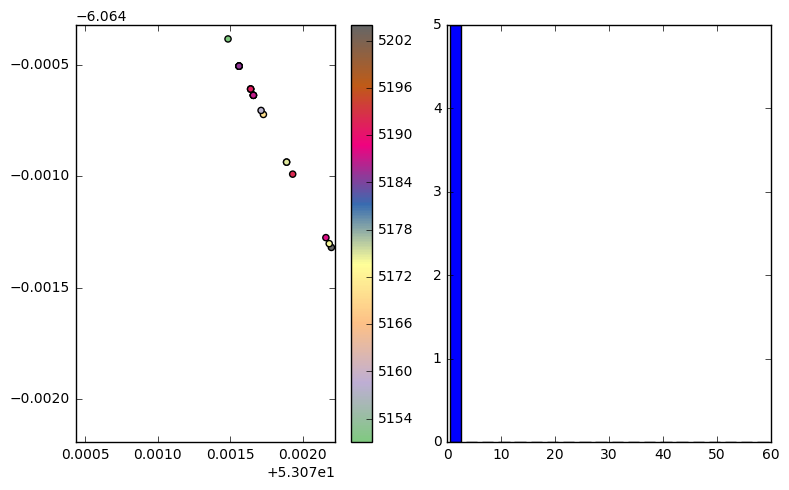

lat_idx 0 lon_idx 294
Cell line ID 145
0    137
1    515
Name: At Stop, dtype: int64
Is stop: True
Num cell points 93


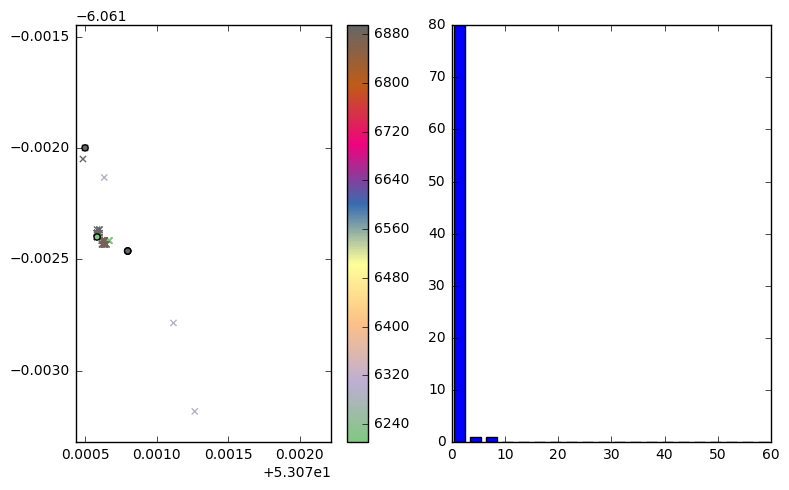

lat_idx 0 lon_idx 294
Cell line ID 84
0    137
1    515
Name: At Stop, dtype: int64
Is stop: True
Num cell points 559


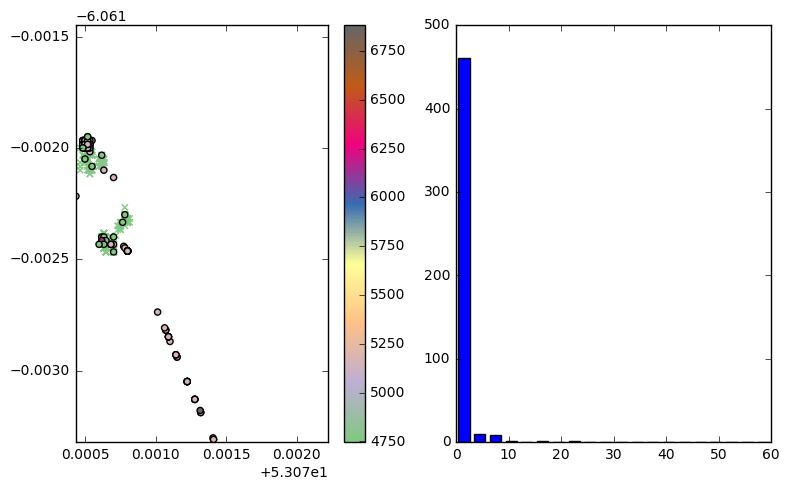

1
lat_idx 1 lon_idx 292
Cell line ID 84
0    31
1     0
Name: At Stop, dtype: int64
Is stop: False
Num cell points 27


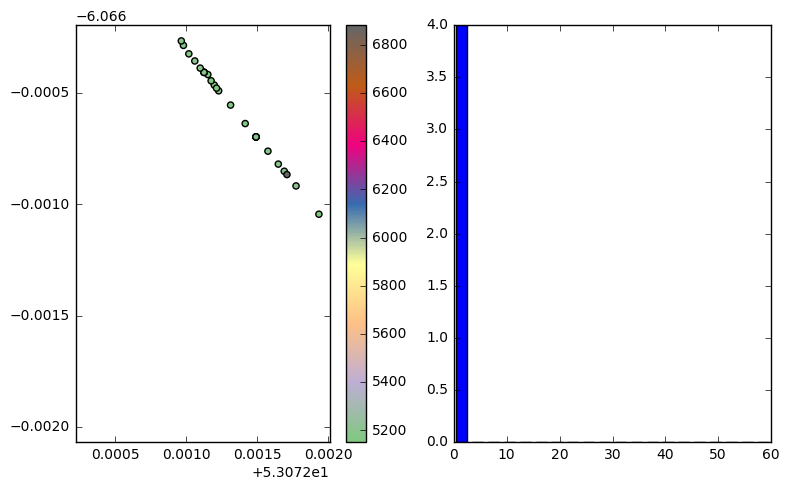

2
3
lat_idx 3 lon_idx 276
Cell line ID 145
0     2
1    54
Name: At Stop, dtype: int64
Is stop: True
Num cell points 56


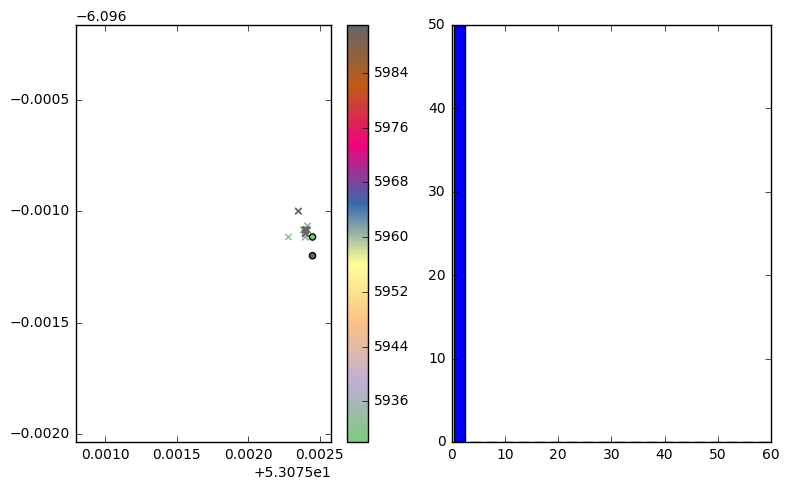

4
lat_idx 4 lon_idx 292
Cell line ID 84
0    26
1    31
Name: At Stop, dtype: int64
Is stop: True
Num cell points 52


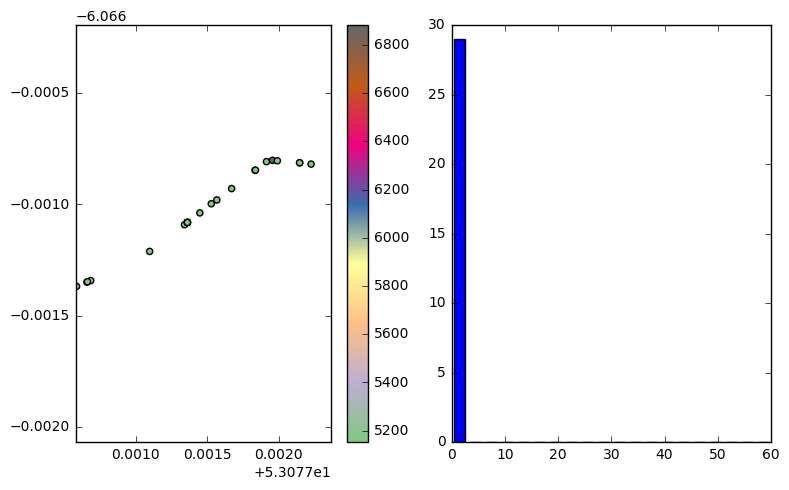

CPU times: user 8.96 s, sys: 3.85 s, total: 12.8 s
Wall time: 8.41 s


In [52]:
%%time
X = []
y = []
show_debug_data = True
for lat_idx in range(0, 5):
    lat_start, lat_stop = lat_min + lat_idx * lat_step, lat_min + (lat_idx + 1) * lat_step
    df_lat_slice = df[(lat_start <= df['Lat']) & (df['Lat'] < lat_stop)]
    print(lat_idx)
    for lon_idx in range(num_cells):
        lon_start, lon_stop = lon_min + lon_idx * lon_step, lon_min + (lon_idx + 1) * lon_step
        cell_data = df_lat_slice[(lon_start <= df_lat_slice['Lon']) & (df_lat_slice['Lon'] < lon_stop)]
        cell_value_counts = cell_data['At Stop'].value_counts(sort=False)

        for cell_line_id in cell_data['Line ID'].unique():
            line_id_df = cell_data[cell_data['Line ID'] == cell_line_id]
            value_counts = np.zeros(2)
            line_hist = None
            line_bins = None
            for cell_journey_id in line_id_df['Vehicle Journey ID'].unique():
                journey_df = line_id_df[line_id_df['Vehicle Journey ID'] == cell_journey_id]
                if len(journey_df) < 5:
                    continue

                journey_df = journey_df.sort_values('Timestamp')
                journey_df = journey_df.join(journey_df[['Timestamp', 'Lon', 'Lat']].shift(), rsuffix='_prev')
                journey_df['Time deltas'] = journey_df['Timestamp'] - journey_df['Timestamp_prev']
                journey_df['Traveled dist'] = journey_df[['Lon', 'Lat', 'Lon_prev', 'Lat_prev']].apply(df_dist, axis=1)
                journey_df['Speed'] = journey_df.apply(df_speed, axis=1)
                save_dir = os.path.join('journey', str(lat_idx), str(lon_idx), cell_line_id)
                os.makedirs(save_dir, exist_ok=True)
                journey_df.to_csv(os.path.join(save_dir, cell_journey_id + '.csv'))

                journey_value_counts = journey_df['At Stop'].value_counts(sort=False)
                features, bins = np.histogram(journey_df['Speed'], bins=20, range=(0, 60))
                if line_hist is None:
                    line_hist = features
                    line_bins = bins
                else:
                    line_hist += features
                value_counts += journey_value_counts
            if line_hist is not None:
                X.append(line_hist / np.sum(line_hist))
                is_stop = value_counts[1] > value_counts[0]
                y.append(is_stop)

                if show_debug_data:
                    print('lat_idx', lat_idx, 'lon_idx', lon_idx)
                    print('Cell line ID', cell_line_id)
                    print(cell_value_counts)
                    print('Is stop:', is_stop)
                    print('Num cell points', len(line_id_df['Lat'])) #For some reason != to value counts.
                    plt.figure(figsize=(8,5))
                    plt.subplot(121)
                    axes = plt.gca()
                    axes.set_xlim([lat_start, lat_stop])
                    axes.set_ylim([lon_start, lon_stop])

#                     plt.scatter(line_id_df[line_id_df['At Stop'] == '1']['Lat'], line_id_df[line_id_df['At Stop'] == '1']['Lon'], color='red', marker='x')
#                     plt.scatter(line_id_df[line_id_df['At Stop'] == '0']['Lat'], line_id_df[line_id_df['At Stop'] == '0']['Lon'], color='blue')
                    at_stop_line_id_df = line_id_df[line_id_df['At Stop'] == '1']
                    plt.scatter(at_stop_line_id_df['Lat'], at_stop_line_id_df['Lon'], c=at_stop_line_id_df['Vehicle Journey ID'], cmap=plt.cm.Accent, marker='x')
                    not_at_stop_line_id_df = line_id_df[line_id_df['At Stop'] == '0']
                    plt.scatter(not_at_stop_line_id_df['Lat'], not_at_stop_line_id_df['Lon'], c=line_id_df[line_id_df['At Stop'] == '0']['Vehicle Journey ID'], cmap=plt.cm.Accent)
                    plt.colorbar()
                    width = 0.7 * (line_bins[1] - line_bins[0])
                    center = (line_bins[:-1] + line_bins[1:]) / 2
                    plt.subplot(122)
                    plt.bar(center, line_hist, align='center', width=width)
                    plt.tight_layout()
                    plt.show()



In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_recall_fscore_support

# print(X)
# print(X / np.linalg.norm(X, axis=1).reshape(-1, 1))


X = np.array(X)
y = np.array(y)
y = y[~np.isnan(X).any(axis=1)]
X = X[~np.isnan(X).any(axis=1)]

print(np.unique(y, return_counts=True))

clf = RandomForestClassifier()
precs, recs, f1s, sups = [], [], [], []
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)
for train_idx, val_idx in kf.split(X, y):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    clf.fit(X_train, y_train)
    pr, rec, f1, sup = precision_recall_fscore_support(y_val, clf.predict(X_val))
    precs.append(pr)
    recs.append(rec)
    f1s.append(f1)
    sups.append(sup)

print("Precision: %0.2f (+/- %0.2f)" % (np.mean(precs), np.std(precs) * 2))
print("Recall: %0.2f (+/- %0.2f)" % (np.mean(recs), np.std(recs) * 2))
print("F1s: %0.2f (+/- %0.2f)" % (np.mean(precs), np.std(f1s) * 2))
print("Support: %0.2f (+/- %0.2f)" % (np.mean(sups), np.std(sups) * 2))

(array([False,  True], dtype=bool), array([132,  16]))
Precision: 0.55 (+/- 0.90)
Recall: 0.52 (+/- 0.93)
F1s: 0.55 (+/- 0.88)
Support: 14.80 (+/- 23.22)


/home/sokolov/miniconda3/envs/bus-stops/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/sokolov/miniconda3/envs/bus-stops/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
